In [1]:
# importing Required Packages
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#reading the file using pandas
Bike_Sharing_DF=pd.read_csv("/Users/vishnuvardhanreddydumbala/Downloads/day.csv")

In [3]:
#checking the data 
Bike_Sharing_DF.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#checking the shape of Dataframe
Bike_Sharing_DF.shape

(730, 16)

In [5]:
#checking datatypes and null values
Bike_Sharing_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#check the summary statistics of numeric data using describe method
Bike_Sharing_DF.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Observations so far:
1.There are 730 rows , 16 columns in the dataset
2.No Null values
3.One date column present in the dataset
4.There are category variables exist in the data such as "season, weathersit, mnth, weekday" and dataypes of these are integer and float

## Removing duplicate and Unwanted columns
Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

instant : This is only row index number

dteday : This is date column but we can drop as the month, year already there in the dataset

casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.

We will save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation

In [7]:
Bike_Sharing_DF.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
Bike_Sharing_DF_New=Bike_Sharing_DF[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [9]:
Bike_Sharing_DF_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## Creation of dummy Varaibles. Before that we need to convert them to categorical variables

In [10]:
# Convert "season, weathersit, mnth, weekday" to 'category' data type
Bike_Sharing_DF_New['season']=Bike_Sharing_DF_New['season'].astype('category')
Bike_Sharing_DF_New['weathersit']=Bike_Sharing_DF_New['weathersit'].astype('category')
Bike_Sharing_DF_New['mnth']=Bike_Sharing_DF_New['mnth'].astype('category')
Bike_Sharing_DF_New['weekday']=Bike_Sharing_DF_New['weekday'].astype('category')

In [11]:
# Cross verify datatypes again 
Bike_Sharing_DF_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [12]:
# Dummy_Variables creation of above variables

Bike_Sharing_DF_New = pd.get_dummies(Bike_Sharing_DF_New, drop_first=True)

#"drop_first=True" parameter drops first dummy variable for each set of dummies created.
Bike_Sharing_DF_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [13]:
Bike_Sharing_DF_New.shape

(730, 30)

## Creating Train and Test data using Sklearn Package
Now we can split the data to train and test data (70:30) ratio and "train_test_split" method from sklearn package

In [14]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(Bike_Sharing_DF_New, train_size = 0.70, test_size = 0.30, random_state = 333)

In [15]:
#checking train data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [16]:
#checking train shape
df_train.shape

(510, 30)

In [17]:
#checking info of test data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null    uint8  
 18  mnth_9        219 non-null   

In [18]:
#checking shape of test data
df_test.shape

(219, 30)

In [19]:
# Performing EDA on Train dataset

In [20]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

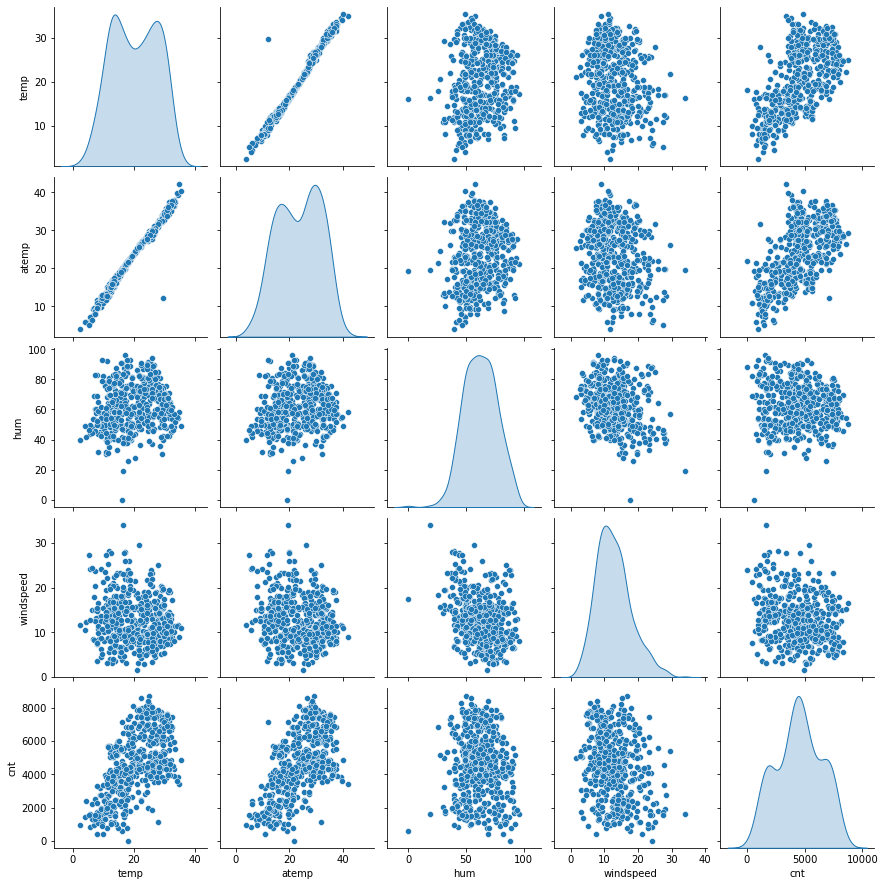

In [21]:
# Create a new dataframe of only numeric variables:

bike_numeric_var=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_numeric_var, diag_kind='kde')

plt.show()

## Observation:
The above pairplot shows Linear relationship between "temp, atemp and cnt variables"

In [106]:
## Visualizing Categorical Variables

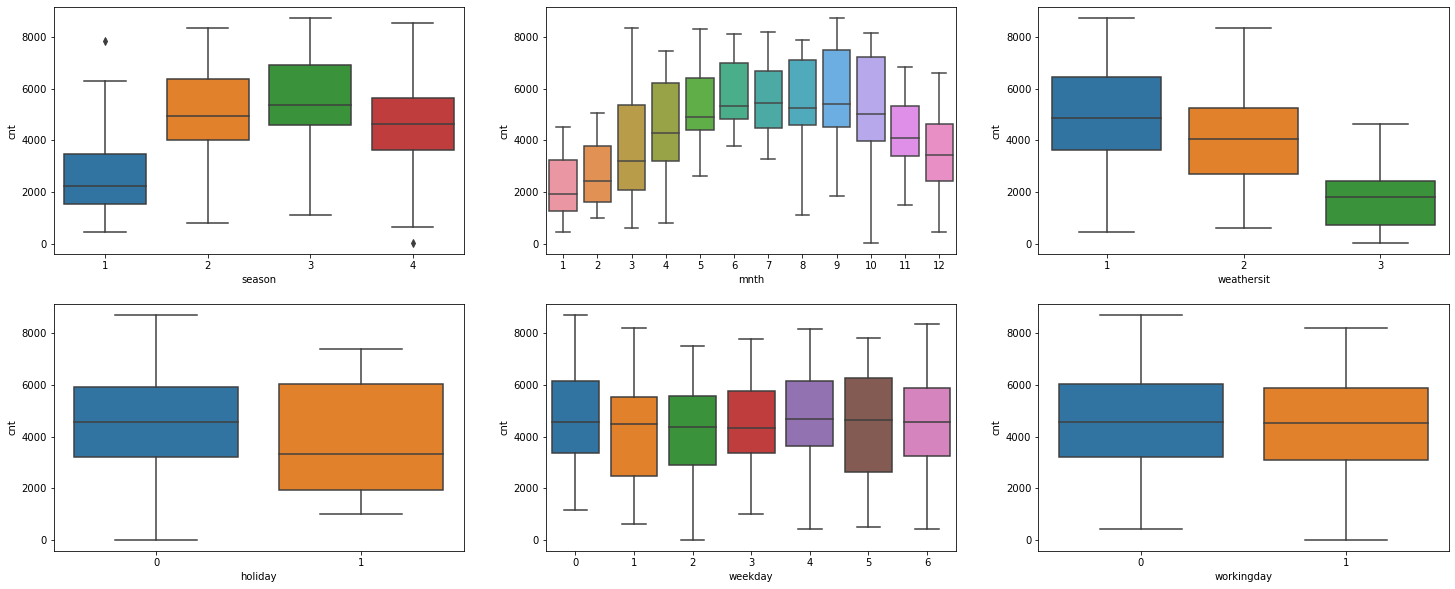

In [108]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bike_Sharing_DF)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bike_Sharing_DF)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bike_Sharing_DF)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bike_Sharing_DF)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bike_Sharing_DF)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bike_Sharing_DF)
plt.show()

## Observations:
There were 6 categorical variables in the dataset.

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) .

The inference that We could derive were:

season: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

mnth: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

weathersit: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

holiday: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.

weekday: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.

workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

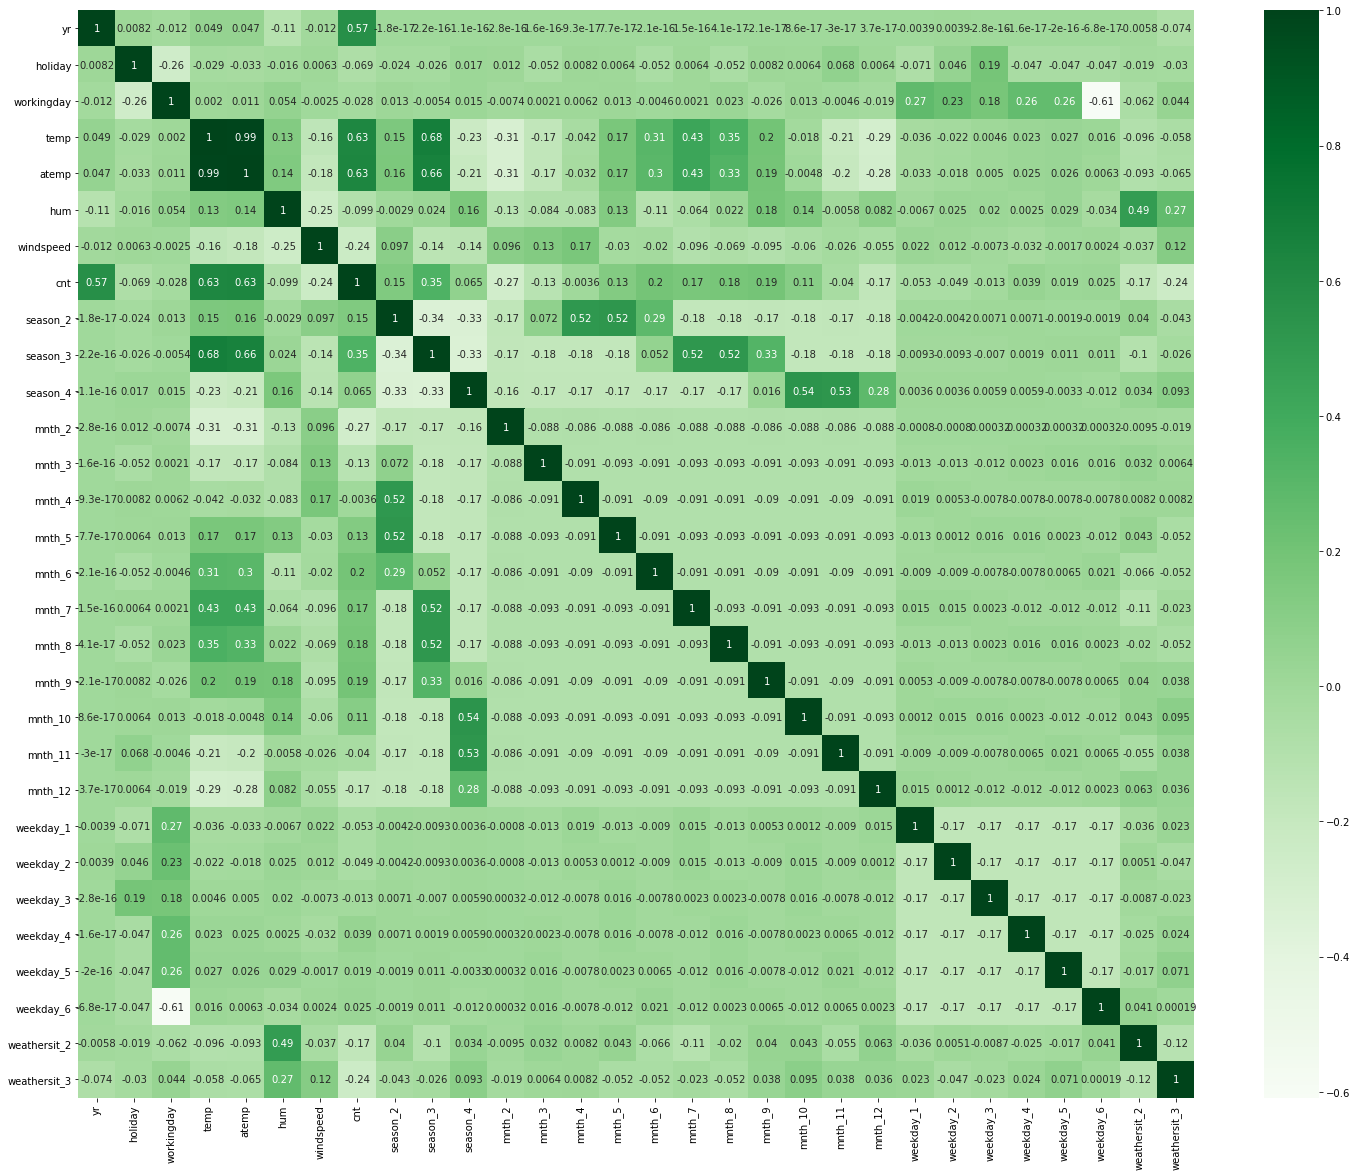

In [22]:
## Correlation Matrix
# Let's check the correlation coefficients to see which variables are highly correlated. 
#Note:here we are considering only those variables (dataframe: Bike_Sharing_DF_New) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(Bike_Sharing_DF_New.corr(), annot = True, cmap="Greens")
plt.show()

## Observations:
The above heatmap clearly shows that which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
We will refer this heatmap back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

In [23]:
## Rescaling Variables using MinMaxScaler

In [24]:
# Importing MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

In [25]:
# Instantiate Scaler Object
scaler = MinMaxScaler()

In [26]:
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,1,18.791653,22.50605,58.7083,7.832836,6304,1,0,...,0,0,1,0,0,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,0,0,0,0,0,0,0,0,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,1,...,0,0,0,0,1,0,0,0,0,0
714,1,0,1,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,1,1,0,0,0,0,0,1,0
8,0,0,1,5.671653,5.80875,43.4167,24.250650,822,0,0,...,0,0,0,1,0,0,0,0,0,0


In [27]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [28]:
#Applying scaler to Numeric Variables

In [29]:
numeric_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])

In [30]:
# Checking values after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,1,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,...,0,0,1,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,0,0,1,0,0,0,0,0
714,1,0,1,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,1,0,0,0,0,0,1,0
8,0,0,1,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,1,0,0,0,0,0,0


In [31]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.692157,0.540901,0.515631,0.647390,0.346318,0.515144,0.247059,0.262745,...,0.086275,0.076471,0.143137,0.152941,0.131373,0.139216,0.147059,0.143137,0.341176,0.025490
std,0.500487,0.151726,0.462054,0.227898,0.213626,0.149722,0.160266,0.224281,0.431725,0.440557,...,0.281045,0.266010,0.350557,0.360284,0.338139,0.346511,0.354512,0.350557,0.474570,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Creating a Linear Model

In [32]:
# Creating X and Y sets for the model building

In [33]:
y_train = df_train.pop('cnt')
X_train = df_train

In [34]:
# Importing RFE and LinearRegression
# RFE stands for Recursive Feature Elimination 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15) # running RFE
rfe = rfe.fit(X_train, y_train)

In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 11),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 10),
 ('mnth_3', True, 1),
 ('mnth_4', False, 8),
 ('mnth_5', False, 6),
 ('mnth_6', False, 7),
 ('mnth_7', False, 15),
 ('mnth_8', False, 9),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 12),
 ('mnth_12', False, 13),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', False, 2),
 ('weekday_4', False, 4),
 ('weekday_5', False, 3),
 ('weekday_6', False, 14),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [37]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_1', 'weekday_2',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [38]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_11', 'mnth_12', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6'],
      dtype='object')

In [39]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Building Linear Model using "StatsModel"

## Model 1 using VIF (Variation Inflation Factor)

In [40]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,386.08
2,atemp,364.04
3,hum,16.13
6,season_3,7.11
4,windspeed,4.51
5,season_2,3.54
7,season_4,3.02
13,weathersit_2,2.15
0,yr,2.02
10,mnth_10,1.66


In [41]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [42]:
# Check the parameters obtained
lr1.params

const           0.238008
yr              0.228826
temp            0.394274
atemp           0.088717
hum            -0.170955
windspeed      -0.179931
season_2        0.132386
season_3        0.085290
season_4        0.152474
mnth_3          0.047074
mnth_9          0.100467
mnth_10         0.055654
weekday_1      -0.024262
weekday_2      -0.036756
weathersit_2   -0.047653
weathersit_3   -0.272332
dtype: float64

In [43]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.1
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          1.36e-185
Time:                        22:39:39   Log-Likelihood:                 506.80
No. Observations:                 510   AIC:                            -981.6
Df Residuals:                     494   BIC:                            -913.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2380      0.028      8.437   

In [44]:
# We can Observe that atemp is having very hight P-Value

## Model 2

In [45]:
#Removing "atemp" variable as its having high P-value and we will check the Model performance again

In [46]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [47]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,23.19
2,hum,15.85
5,season_3,7.03
3,windspeed,4.35
4,season_2,3.54
6,season_4,3.01
12,weathersit_2,2.14
0,yr,2.02
9,mnth_10,1.66
8,mnth_9,1.28


In [48]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [49]:
# Check the parameters obtained
lr2.params

const           0.239301
yr              0.228801
temp            0.478180
hum            -0.170199
windspeed      -0.183401
season_2        0.132551
season_3        0.083833
season_4        0.152847
mnth_3          0.047300
mnth_9          0.100500
mnth_10         0.055765
weekday_1      -0.023908
weekday_2      -0.036461
weathersit_2   -0.047855
weathersit_3   -0.272823
dtype: float64

In [50]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     185.7
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          1.20e-186
Time:                        22:39:41   Log-Likelihood:                 506.59
No. Observations:                 510   AIC:                            -983.2
Df Residuals:                     495   BIC:                            -919.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2393      0.028      8.509   

## Observation: "hum" VIF is very high (Second Highest), Temp is the highest VIF but this is an imp factor so we are considering hum

 ## Model 3

In [51]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [52]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,15.20
4,season_3,6.69
2,windspeed,3.89
3,season_2,3.51
5,season_4,2.89
0,yr,2.01
8,mnth_10,1.66
11,weathersit_2,1.51
7,mnth_9,1.27
10,weekday_2,1.21


In [53]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [54]:
lr3.params

const           0.141684
yr              0.232973
temp            0.446142
windspeed      -0.146573
season_2        0.134285
season_3        0.093151
season_4        0.149627
mnth_3          0.054857
mnth_9          0.092169
mnth_10         0.054644
weekday_1      -0.027920
weekday_2      -0.039708
weathersit_2   -0.076113
weathersit_3   -0.323355
dtype: float64

In [55]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.9
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          1.86e-183
Time:                        22:39:47   Log-Likelihood:                 496.25
No. Observations:                 510   AIC:                            -964.5
Df Residuals:                     496   BIC:                            -905.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1417      0.018      7.702   

# Model 4

In [56]:
## Now we need to remove the Season_3 to check performance of model

In [57]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)

In [58]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.05
2,windspeed,3.72
0,yr,2.00
4,season_4,1.94
7,mnth_10,1.63
3,season_2,1.56
10,weathersit_2,1.50
6,mnth_9,1.23
9,weekday_2,1.21
8,weekday_1,1.18


In [59]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [60]:
# Check the parameters obtained
lr4.params

const           0.125234
yr              0.231122
temp            0.564492
windspeed      -0.151266
season_2        0.083200
season_4        0.117244
mnth_3          0.043118
mnth_9          0.104368
mnth_10         0.042721
weekday_1      -0.024960
weekday_2      -0.038079
weathersit_2   -0.076298
weathersit_3   -0.315252
dtype: float64

In [61]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     197.9
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          1.66e-180
Time:                        22:39:52   Log-Likelihood:                 486.48
No. Observations:                 510   AIC:                            -947.0
Df Residuals:                     497   BIC:                            -891.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1252      0.018      6.828   

In [62]:
## Observation : The variable 'mnth_10' has Very High p-value.

In [63]:
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

In [64]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.95
2,windspeed,3.68
0,yr,1.99
3,season_2,1.56
9,weathersit_2,1.50
4,season_4,1.38
8,weekday_2,1.21
6,mnth_9,1.20
7,weekday_1,1.18
5,mnth_3,1.14


In [65]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [66]:
# Check the parameters obtained
lr5.params

const           0.122966
yr              0.229933
temp            0.571723
windspeed      -0.154162
season_2        0.082012
season_4        0.132559
mnth_3          0.043741
mnth_9          0.097884
weekday_1      -0.025892
weekday_2      -0.037583
weathersit_2   -0.074658
weathersit_3   -0.309677
dtype: float64

In [67]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.5
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          1.60e-180
Time:                        22:39:56   Log-Likelihood:                 483.73
No. Observations:                 510   AIC:                            -943.5
Df Residuals:                     498   BIC:                            -892.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1230      0.018      6.684   

In [68]:
## Observation : mnth_3 is having high-p-value which we can remove this in next model: Model 6

In [69]:
X_train_new = X_train_new.drop(["mnth_3"], axis = 1)

In [70]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.92
2,windspeed,3.54
0,yr,1.98
3,season_2,1.56
8,weathersit_2,1.48
4,season_4,1.36
7,weekday_2,1.21
5,mnth_9,1.19
6,weekday_1,1.18
9,weathersit_3,1.07


In [71]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [72]:
# Check the parameters obtained
lr6.params

const           0.133572
yr              0.230548
temp            0.559947
windspeed      -0.153366
season_2        0.082154
season_4        0.126590
mnth_9          0.096227
weekday_1      -0.027623
weekday_2      -0.037692
weathersit_2   -0.073758
weathersit_3   -0.305450
dtype: float64

In [73]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.3
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          3.51e-180
Time:                        22:40:04   Log-Likelihood:                 480.10
No. Observations:                 510   AIC:                            -938.2
Df Residuals:                     499   BIC:                            -891.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1336      0.018      7.391   

## Observation: This model 6 seems to be good as we can see Very low Multicollinearity between Independant or Predictor variables and p-values for these are significant

In [74]:
#################

In [75]:
## Hypothesis Testing for Model 6:

H0:B1=B2=...=Bn=0
H1: at least one Bi!=0

In [76]:
# Model 6 Coefficient values are as below:

const            0.1336      
yr               0.2305      
temp             0.5599      
windspeed       -0.1534      
season_2         0.0822      
season_4         0.1266      
mnth_9           0.0962      
weekday_1       -0.0276      
weekday_2       -0.0377      
weathersit_2    -0.0738      
weathersit_3    -0.3054 

## As per Model 6 , all of the coefficients are not equal to zero which means : We Reject the Null Hypothesis

F Statistics
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic: 231.3
Prob (F-statistic): 3.51e-180
The F-Statistics value of 231.3 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

The equation of best fitted surface based on model lr6:
cnt = 0.1336 + (yr * 0.2305) + (temp * 0.5599) − (windspeed * 0.1534) + (season_2 * 0.0822) + (season_4 * 0.1266) + (mnth9 * 0.0962) - (weekday_1 * 0.0276) − (weekday_2 * 0.0377)-(weathersit_2 * 0.0738) − (weathersit3 * 0.3054)


## Linear Regression Assumptions

In [82]:
## Checking if error terms follows Normal Distribution

In [83]:
## Residual Analysis of Training Data

In [84]:
y_train_pred = lr6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

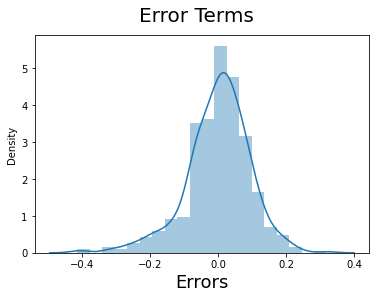

In [85]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [86]:
## As per above diagram we can see that Residuals follows normal distribution. so our model is valid 

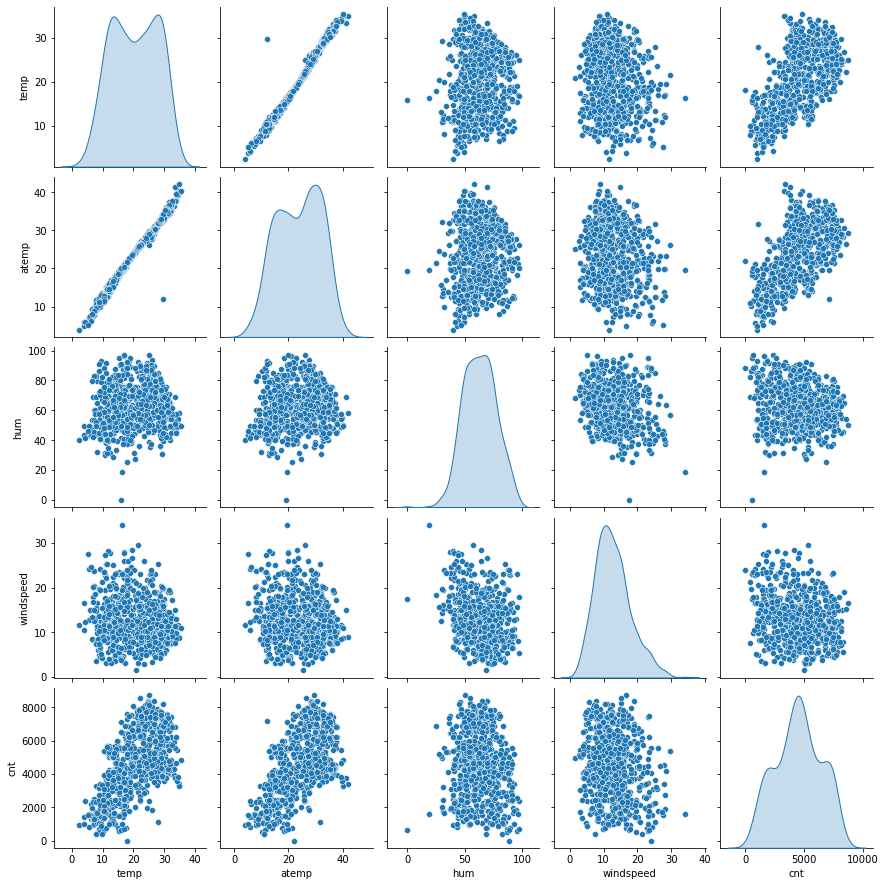

In [88]:
Bike_Sharing_DF_New=Bike_Sharing_DF_New[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(Bike_Sharing_DF_New, diag_kind='kde')
plt.show()

In [89]:
## Using the pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’.

## There is No Multicollinearity between the predictor variables

In [90]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.92
2,windspeed,3.54
0,yr,1.98
3,season_2,1.56
8,weathersit_2,1.48
4,season_4,1.36
7,weekday_2,1.21
5,mnth_9,1.19
6,weekday_1,1.18
9,weathersit_3,1.07


## Observation:
As per above VIF values, we can see that, all values are in permissible range and there is no multicollinearity between independant variables

## Predictions using Final Model i.e lr6 :

In [92]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [93]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,1,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,1,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,...,0,0,0,0,0,0,0,0,0,0
553,1,0,1,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,...,0,0,1,0,0,0,0,0,0,0
504,1,0,1,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,...,0,0,1,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,1,0,0,0,1,0,0,1,0


In [94]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.689498,0.551225,0.527528,0.662567,0.346706,0.518889,0.264840,0.246575,...,0.073059,0.105023,0.146119,0.123288,0.168950,0.150685,0.132420,0.141553,0.324201,0.036530
std,0.501098,0.198967,0.463759,0.229463,0.215434,0.143562,0.159553,0.219953,0.442259,0.432005,...,0.260830,0.307285,0.354034,0.329520,0.375566,0.358561,0.339723,0.349389,0.469148,0.188034
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
# Splitting data into X_test, y_test

In [96]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null   

In [97]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   temp          219 non-null    float64
 3   windspeed     219 non-null    float64
 4   season_2      219 non-null    uint8  
 5   season_4      219 non-null    uint8  
 6   mnth_9        219 non-null    uint8  
 7   weekday_1     219 non-null    uint8  
 8   weekday_2     219 non-null    uint8  
 9   weathersit_2  219 non-null    uint8  
 10  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(7)
memory usage: 10.1 KB


In [98]:
# Making predictions using the final model (lr6)
y_pred = lr6.predict(X_test_lm6)

## Model Evaluation

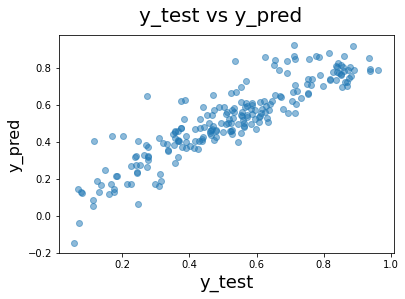

In [99]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

## R^2 value for Test data

In [101]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8074759535254332

In [102]:
# Get the shape of X_test
X_test.shape

(219, 10)

In [103]:
#finding out Adjusted R^2 value using formula

In [105]:
# n is number of rows in X
n = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]
# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-0.80747595)*(n-1)/(n-p-1)
adjusted_r2

0.7982199860576924

## Final Comparison 
Train R^2 :0.823
Train Adjusted R^2 :0.819
Test R^2 :0.8074
Test Adjusted R^2 :0.7982
This seems to be a really good model that can very well 'Generalize' various datasets.

## Final Observations

As per our final Model, the top 3 predictor variables that influences the bike booking are:

Temperature (temp) - A coefficient value of ‘0.5599’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5599 units.

Weather Situation 3 (weathersit_3) - A coefficient value of ‘-0.3054’ indicated that, w.r.t Weathersit_1, a unit increase in Weathersit_3 variable decreases the bike hire numbers by 0.3054 units.

Year (yr) - A coefficient value of ‘0.2305’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2305 units.
So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking
The next best features that can also be considered are

season_4: - A coefficient value of ‘0.1266’ indicated that w.r.t season_2, a unit increase in season_4 variable increases the bike hire numbers by 0.1266 units.

windspeed: - A coefficient value of ‘-0.1534’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1534 units.

## NOTE:

The details of weathersit_1 & weathersit_3
weathersit_2: Clear, Few clouds, Partly cloudy, Partly cloudy
weathersit_3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
